In [2]:
!pip install opendatasets --quiet

In [30]:
import pandas as pd
import numpy as np
import opendatasets as od
import email
import random
import os
import re
import nltk

pd.set_option('display.max_colwidth', 300)

In [4]:
url = (
    "https://www.kaggle.com/datasets/wcukierski/enron-email-dataset"
)

od.download(url)

100%|██████████| 358M/358M [00:04<00:00, 79.1MB/s]


In [5]:
!ls -lh ./enron-email-dataset/

total 1.4G
-rw-r--r-- 1 root root 1.4G Jan  7 09:54 emails.csv


# Enron Emails

In [6]:
emails = pd.read_csv("./enron-email-dataset/emails.csv")
emails.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [7]:
emails.shape

(517401, 2)

In [9]:
print(emails['message'][0])

Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 


In [10]:
# Extract messages
def extract_msg(df):
  messages = []
  for msg in df['message']:
    # Return a message object structure from a string
    e = email.message_from_string(msg)
    # get message body  
    msg_body = e.get_payload()
    messages.append(msg_body)
    
  return messages

In [12]:
bodies = extract_msg(emails)

In [13]:
bodies_df = pd.DataFrame(random.sample(bodies, 10000))
bodies_df.head()

,0
0,"Kim:\n\n(See attached file: EPECONb BASE.doc)\n\nThis is EPE's base gas contract - from the GISB S-T contract model.\n\nEPE's lawyer working on the contract with ENRON in 2000 was Mr. Will\nGuerant\n at 512-495-8832.\n\nThanks,\n\nBarry\n - EPECONb BASE.doc"
1,"What is the status of this?\n---------------------- Forwarded by Richard B Sanders/HOU/ECT on 09/17/99 \n12:22 PM ---------------------------\n\n\nDale Snyder\n09/13/99 03:41 PM\nTo: Mark J Leskowitz/HOU/ECT@ECT\ncc: Chad Pennix/HOU/ECT@ECT, Tomas Tellez/HOU/ECT@ECT, Michael \nPhilips/HOU/ECT@EC..."
2,"Please find attached the final program for an exciting conference on ""REAL\nOPTIONS VALUATION IN THE NEW ECONOMY: Internet/E-commerce,\nR&D/Pharmaceuticals, Energy."" The conference, organised in New York City\nMarch 13-15 by the Real Options Group and co-sponsored by Ernst & Young\nLLP, is addre..."
3,Carolyn George - 3-3439
4,"I think there's probably a lot of truth to the Eric theory. The retaliatio=\nn/numbing afforded by using people and tossing them aside can be tempting. =\n My mini-rampage after Ted was totally based upon treating any representat=\nive of Ted's sex like dirt. Fortunately, my behavior was very..."


# Fraudulent Emails
Having loaded the Enron emails, let’s do the same for the “419” fraudulent email corpus, so that we can have some example data in our training set representing the spam class.

In [14]:
url = (
    "https://www.kaggle.com/datasets/rtatman/fraudulent-email-corpus"
)
od.download(url)

100%|██████████| 5.52M/5.52M [00:00<00:00, 41.0MB/s]

In [15]:
!ls -l ./fraudulent-email-corpus/

total 16940
-rw-r--r-- 1 root root 17344435 Jan  7 10:26 fradulent_emails.txt


In [22]:
fp = os.path.join("./fraudulent-email-corpus", "fradulent_emails.txt")

with open(fp, encoding="latin-1") as f:
  data = f.read()

fraud_emails = data.split("From r")

In [23]:
len(fraud_emails)

3978

In [25]:
print(fraud_emails[3])

  Thu Oct 31 17:27:16 2002
Return-Path: <obong_715@epatra.com>
X-Sieve: cmu-sieve 2.0
Return-Path: <obong_715@epatra.com>
Message-Id: <200210312227.g9VMQvDj017948@bluewhale.cs.CU>
From: "PRINCE OBONG ELEME" <obong_715@epatra.com>
Reply-To: obong_715@epatra.com
To: webmaster@aclweb.org
Date: Thu, 31 Oct 2002 22:17:55 +0100
Subject: GOOD DAY TO YOU
X-Mailer: Microsoft Outlook Express 5.00.2919.6900DM
MIME-Version: 1.0
Content-Type: text/plain; charset="us-ascii"
Content-Transfer-Encoding: 8bit
X-MIME-Autoconverted: from quoted-printable to 8bit by sideshowmel.si.UM id g9VMRBW20642
Status: RO

FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF ELEME KINGDOM 
CHIEF DANIEL ELEME, PHD, EZE 1 OF ELEME.E-MAIL 
ADDRESS:obong_715@epatra.com  

ATTENTION:PRESIDENT,CEO Sir/ Madam. 

This letter might surprise you because we have met
neither in person nor by correspondence. But I believe
it is one day that you got to know somebody either in
physical or through correspondence. 

I got your contact through 

In [27]:
fraud = pd.DataFrame(fraud_emails, columns=["message"], dtype=str)
fraud_bodies = extract_msg(fraud)
fraud_bodies_df = pd.DataFrame(fraud_bodies[1:])
fraud_bodies_df.head()

,0
0,"FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-27-587908.\nE-MAIL: (james_ngola2002@maktoob.com).\n\nURGENT BUSINESS ASSISTANCE AND PARTNERSHIP.\n\n\nDEAR FRIEND,\n\nI AM ( DR.) JAMES NGOLA, THE PERSONAL ASSISTANCE TO THE LATE CONGOLESE (PRESIDENT LAURENT KABILA) WHO WAS ASSASSINATED BY HIS BODY G..."
1,"Dear Friend,\n\nI am Mr. Ben Suleman a custom officer and work as Assistant controller of the Customs and Excise department Of the Federal Ministry of Internal Affairs stationed at the Murtala Mohammed International Airport, Ikeja, Lagos-Nigeria.\n\nAfter the sudden death of the former Head of s..."
2,"FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF ELEME KINGDOM \nCHIEF DANIEL ELEME, PHD, EZE 1 OF ELEME.E-MAIL \nADDRESS:obong_715@epatra.com \n\nATTENTION:PRESIDENT,CEO Sir/ Madam. \n\nThis letter might surprise you because we have met\nneither in person nor by correspondence. But I believe\nit is..."
3,"FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF ELEME KINGDOM \nCHIEF DANIEL ELEME, PHD, EZE 1 OF ELEME.E-MAIL \nADDRESS:obong_715@epatra.com \n\nATTENTION:PRESIDENT,CEO Sir/ Madam. \n\nThis letter might surprise you because we have met\nneither in person nor by correspondence. But I believe\nit is..."
4,"Dear sir, \n \nIt is with a heart full of hope that I write to seek your help in respect of the context below. I am Mrs. Maryam Abacha the former first lady of the former Military Head of State of Nigeria General Sani Abacha whose sudden death occurred on 8th of June 1998 as a result of cardiac ..."


## Define Tokenization, Stop-word and Punctuation Removal Functions
Before proceeding, we must decide how many samples to draw from each class. We must also decide the maximum number of tokens per email, and the maximum length of each token. This is done by setting the following overarching hyperparameters

In [28]:
Nsamp = 1000 # number of samples to generate in each class - 'spam', 'not spam'
maxtokens = 200 # the maximum number of tokens per document
maxtokenlen = 100 # the maximum length of each token

### Tokenization

In [29]:
def Tokenize(row):
  if row is None or row == '':
    tokens = ''
  else:
    tokens = str(row).split(" ")[:maxtokens]
  return tokens

### Use regular expressions to remove unnecessary characters

In [31]:
def reg_expressions(row):
  tokens = []
  try:
    for token in row:
      token = token.lower()
      token = re.sub(r"[\W\d]", "", token)
      token = token[:maxtokenlen]
      tokens.append(token)

  except:
    token = ""
    tokens.append(token)
    
  return tokens



### Stop-word removal

In [32]:
nltk.download('stopwords')
from nltk.corpus import stopwords


stopwords = stopwords.words('english')    

def stop_word_removal(row):
    token = [token for token in row if token not in stopwords]
    token = filter(None, token)
    return token

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Putting preprocessing steps together to build email datase

In [40]:
EnronEmails = (
    bodies_df.iloc[:, 0].apply(Tokenize)
    .apply(stop_word_removal)
    .apply(reg_expressions)
    .sample(Nsamp)
)

SpamEmails = (
    fraud_bodies_df.iloc[:, 0].apply(Tokenize)
    .apply(stop_word_removal)
    .apply(reg_expressions)
    .sample(Nsamp)
)

raw_data = pd.concat([SpamEmails,EnronEmails], axis=0).values

In [41]:
print("Shape of combined data represented as NumPy array is:")
print(raw_data.shape)
print("Data represented as NumPy array is:")
print(raw_data)

Shape of combined data represented as NumPy array is:
(2000,)
Data represented as NumPy array is:
[list(['emailmessagemessage', 'object', 'xfefa', 'emailmessagemessage', 'object', 'xfefa'])
 list(['attentionait', 'pleasure', 'contact', 'assistance', 'andbusiness', 'cooperatione', 'i', 'know', 'content', 'thisletter', 'might', 'surprising', 'i', 'assure', 'youthat', 'every', 'word', 'truee', 'even', 'though', 'hardlyknow', 'i', 'believe', 'help', 'meeei', 'dre', 'rilwanu', 'lukmancpresident', 'adviser', 'petroleumand', 'energy', 'alternate', 'chairman', 'nenepecboardalso', 'opec', 'president', 'designateemy', 'office', 'monitorsthe', 'sales', 'lifting', 'crude', 'oil', 'petroleumproduct', 'foreign', 'dealerse', 'with', 'cooperation', 'myassistant', 'head', 'audit', 'committee', 'attached', 'tothe', 'task', 'forcec', 'i', 'successfully', 'saved', 'aboutuse', 'millionethis', 'money', 'result', 'allocation', 'excesscrude', 'oil', 'foreign', 'dealersc', 'soldbut', 'money', 'entered', 'finan

In [42]:
# create corresponding labels
Categories = ['spam','notspam']
header = ([1]*Nsamp)
header.extend(([0]*Nsamp))

## Converting the email text into numbers

In [46]:
def assemble_bag(data):
    used_tokens = []
    all_tokens = []

    for item in data:
        for token in item:
            if token in all_tokens:
                if token not in used_tokens:
                    used_tokens.append(token)
            else:
                all_tokens.append(token)
    
    df = pd.DataFrame(0, index = np.arange(len(data)), columns = used_tokens)
    
    for i, item in enumerate(data):
        for token in item:
            if token in used_tokens:
                df.iloc[i][token] += 1    
    return df

In [47]:
# create bag-of-words model
EnronSpamBag = assemble_bag(raw_data)
# this is the list of words in our bag-of-words model
predictors = [column for column in EnronSpamBag.columns]
EnronSpamBag # display the model for the user

,emailmessagemessage,object,xfefa,i,oil,foreign,money,task,forcec,help,...,athomasnewenergycom,delaney,smutnyjones,meetingi,inclined,florio,fielder,braun,madame,elsesser
0,2,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,6,2,2,5,3,2,2,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,6,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,1,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# shuffle raw data first
def unison_shuffle_data(data, header):
    p = np.random.permutation(len(header))
    data = data[p,:]
    header = np.asarray(header)[p]
    return data, header
data, header = unison_shuffle_data(EnronSpamBag.values, header)

# split into independent 70% training and 30% testing sets
idx = int(0.7*data.shape[0])

# 70% of data for training
train_x = data[:idx,:]
train_y = header[:idx]
# # remaining 30% for testing
test_x = data[idx:,:]
test_y = header[idx:] 

print("train_x/train_y list details, to make sure they are of the right form:")
print(len(train_x))
print(train_x)
print(train_y[:5])
print(len(train_y))

train_x/train_y list details, to make sure they are of the right form:
1400
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 2 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 1 1 1 0]
1400


# Logistic Regression Classifier

In [49]:
from sklearn.linear_model import LogisticRegression

def fit(train_x,train_y):
    model = LogisticRegression(solver="lbfgs")

    try:
        model.fit(train_x, train_y)
    except:
        pass
    return model

model = fit(train_x,train_y)

In [50]:
predicted_labels = model.predict(test_x)

# print all labels for full trasparency
print("DEBUG::The logistic regression predicted labels are::")
print(predicted_labels)

DEBUG::The logistic regression predicted labels are::
[0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0
 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0
 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0
 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0
 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1
 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1
 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0
 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1
 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1
 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0

In [51]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(test_y, predicted_labels)

print("DEBUG::The logistic regression accuracy score is::")
print(acc_score)

DEBUG::The logistic regression accuracy score is::
0.9883333333333333


# Support Vector Machine Classifier

In [52]:
import time
from sklearn.svm import SVC # Support Vector Classification model

In [53]:
# Create a support vector classifier
clf = SVC(C=1, gamma="auto", probability=True)

# Fit the classifier using the training data
start_time = time.time()
clf.fit(train_x, train_y)
end_time = time.time()
print("Training the SVC Classifier took %3d seconds"%(end_time-start_time))

predicted_labels = clf.predict(test_x)
print("DEBUG::The SVC Classifier predicted labels are::")
print(predicted_labels)

acc_score = accuracy_score(test_y, predicted_labels)

print("DEBUG::The SVC Classifier accuracy score is::")
print(acc_score)

Training the SVC Classifier took  74 seconds
DEBUG::The SVC Classifier predicted labels are::
[0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1
 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0
 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0
 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0
 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1
 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1
 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1
 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1
 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0
 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1
 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0
 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1
 1 1 1

# Random Forests

In [54]:
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=1, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (spam, not spam?)
start_time = time.time()
clf.fit(train_x, train_y)
end_time = time.time()
print("Training the Random Forest Classifier took %3d seconds"%(end_time-start_time))

predicted_labels = clf.predict(test_x)
print("DEBUG::The RF predicted labels are::")
print(predicted_labels)

acc_score = accuracy_score(test_y, predicted_labels)

print("DEBUG::The RF testing accuracy score is::")
print(acc_score)

Training the Random Forest Classifier took   2 seconds
DEBUG::The RF predicted labels are::
[0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0
 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0
 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0
 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0
 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1
 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1
 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0
 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1
 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1
 1 0 1 1

In [55]:
# Now, tune parameters systematically
from sklearn.model_selection import GridSearchCV

print("Available hyper-parameters for systematic tuning available with RF:")
print(clf.get_params())

# select a subset of parameters to tune, and specify grid for each
param_grid = {
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 6, 10],
    'n_estimators': [10, 100, 1000]
}
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(train_x, train_y)

print("Best parameters found:")
print(grid_search.best_params_)

print("Estimated accuracy is:")
acc_score = accuracy_score(test_y, grid_search.best_estimator_.predict(test_x))
print(acc_score)

Available hyper-parameters for systematic tuning available with RF:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': 1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:
{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
Estimated accuracy is:
0.98


# Download IMDB Movie Review Dataset

In [56]:
## Read-in the reviews and print some basic descriptions of them

!wget -q "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
!tar xzf aclImdb_v1.tar.gz

In [58]:
# shuffle raw data first
def unison_shuffle_data(data, header):
    p = np.random.permutation(len(header))
    data = data[p]
    header = np.asarray(header)[p]
    return data, header

# load data in appropriate form
def load_data(path):
    data, sentiments = [], []
    for folder, sentiment in (('neg', 0), ('pos', 1)):
        folder = os.path.join(path, folder)
        for name in os.listdir(folder):
            with open(os.path.join(folder, name), 'r') as reader:
                  text = reader.read()
            text = Tokenize(text)
            text = stop_word_removal(text)
            text = reg_expressions(text)
            data.append(text)
            sentiments.append(sentiment)
    data_np = np.array(data)
    data, sentiments = unison_shuffle_data(data_np, sentiments)
    
    return data, sentiments

train_path = os.path.join('aclImdb', 'train')
test_path = os.path.join('aclImdb', 'test')
raw_data, raw_header = load_data(train_path)

print(raw_data.shape)
print(len(raw_header))

(25000,)
25000


<ipython-input-58-aead18603fef>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_np = np.array(data)


In [59]:
# Subsample required number of samples
random_indices = np.random.choice(range(len(raw_header)),size=(Nsamp*2,),replace=False)
data_train = raw_data[random_indices]
header = raw_header[random_indices]

print("DEBUG::data_train::")
print(data_train)

DEBUG::data_train::
[list(['i', 'seen', 'couple', 'movies', 'eating', 'disorders', 'one', 'definitely', 'favorite', 'one', 'the', 'problem', 'ones', 'people', 'eating', 'disorders', 'towards', 'end', 'automatically', 'get', 'better', 'accept', 'fact', 'need', 'help', 'thats', 'it', 'movie', 'i', 'thought', 'realistic', 'cause', 'one', 'main', 'character', 'lexi', 'automatically', 'get', 'better', 'she', 'gets', 'better', 'drawback', 'i', 'think', 'movie', 'shows', 'others', 'ive', 'seen', 'getting', 'better', 'happen', 'hard', 'work', 'takes', 'time', 'long', 'path', 'recovery', 'i', 'think', 'movie', 'shows', 'well', 'there', 'movies', 'like', 'this'])
 list(['i', 'expecting', 'documentary', 'focused', 'tobacco', 'industry', 'north', 'carolina', 'instead', 'i', 'watched', 'man', 'rues', 'fact', 'great', 'grandfather', 'lost', 'tobacco', 'empire', 'duke', 'family', 'and', 'went', 'on', 'if', 'mr', 'mcelwees', 'family', 'prevailed', 'dukes', 'i', 'doubt', 'mr', 'mcelwee', 'would', 'prob

In [60]:
unique_elements, counts_elements = np.unique(header, return_counts=True)
print("Sentiments and their frequencies:")
print(unique_elements)
print(counts_elements)

Sentiments and their frequencies:
[0 1]
[ 980 1020]


## Featurize and Create Labels

In [61]:
MixedBagOfReviews = assemble_bag(data_train)
# this is the list of words in our bag-of-words model
predictors = [column for column in MixedBagOfReviews.columns]

MixedBagOfReviews

,one,eating,disorders,i,automatically,get,better,movie,seen,think,...,mazinger,extravagant,coleman,horizon,messes,randall,bro,item,rosalind,rosie
0,3,2,2,4,2,2,4,3,2,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,2,0,2,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,2,0,0,3,0,0,0,0,0,0,...,2,1,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,2,0,0,...,0,0,2,1,0,0,0,0,0,0
1998,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,1,2,2,1,0,0


In [62]:
# split into independent 70% training and 30% testing sets
data = MixedBagOfReviews.values

idx = int(0.7*data.shape[0])

# 70% of data for training
train_x = data[:idx,:]
train_y = header[:idx]
# remaining 30% for testing
test_x = data[idx:,:]
test_y = header[idx:] 

print("train_x/train_y list details, to make sure it is of the right form:")
print(len(train_x))
print(train_x)
print(train_y[:5])
print(len(train_y))

train_x/train_y list details, to make sure it is of the right form:
1400
[[3 2 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 ...
 [3 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 0 1 0 0]
1400


In [63]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

# create the transform - uncomment the one you want to focus on
# vectorizer = CountVectorizer() # this is equivalent to the bag of words
vectorizer = TfidfVectorizer() # tf-idf vectorizer
# vectorizer = HashingVectorizer(n_features=3000) # hashing vectorizer

In [64]:
# build vocabulary
vectorizer.fit([' '.join(sublst) for sublst in data_train])
# summarize
print(len(vectorizer.vocabulary_))
#print(vectorizer.idf_)
# encode one document
vector = vectorizer.transform([' '.join(data_train[0])])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

USE = False # set this to 'True' if you want to use the vectorizer featurizers instead of the bag-of-words done before
if(USE):
    data = vectorizer.transform([' '.join(sublst) for sublst in data_train]).toarray()
    # 70% of data for training
    train_x = data[:idx,:]
    # remaining 30% for testing
    test_x = data[idx:,:]

    print("train_x/train_y list details, to make sure it is of the right form:")
    print(train_x.shape[0])
    print(train_x)
    print(train_y[:5])
    print(len(train_y))
    predictors = [column for column in vectorizer.vocabulary_]

24274
(1, 24274)
[[0. 0. 0. ... 0. 0. 0.]]


# LR

In [65]:
model = fit(train_x,train_y)

In [66]:
predicted_labels = model.predict(test_x)

# print all labels for full trasparency
print("DEBUG::The logistic regression predicted labels are::")
print(predicted_labels)

DEBUG::The logistic regression predicted labels are::
[0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1
 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0
 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1
 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1
 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0
 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1
 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0
 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1

In [67]:
acc_score = accuracy_score(test_y, predicted_labels)

print("The logistic regression accuracy score is::")
print(acc_score)

The logistic regression accuracy score is::
0.755


# Support Vector Machine Classifier

In [68]:
# Create a support vector classifier
clf = SVC(C=1, gamma="auto", kernel='linear',probability=False)

# Fit the classifier using the training data
start_time = time.time()
clf.fit(train_x, train_y)
end_time = time.time()
print("Training the SVC Classifier took %3d seconds"%(end_time-start_time))

# test and evaluate
predicted_labels = clf.predict(test_x)
print("DEBUG::The SVC Classifier predicted labels are::")
print(predicted_labels)

acc_score = accuracy_score(test_y, predicted_labels)
print("The SVC Classifier testing accuracy score is::")
print(acc_score)

Training the SVC Classifier took  17 seconds
DEBUG::The SVC Classifier predicted labels are::
[0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1
 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1
 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1
 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0
 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0
 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0
 1 1 1

# Gradient Boosting Machines


Model Report
Accuracy : 0.9164
AUC Score (Train): 0.983109
CV Score : Mean - 0.8351789 | Std - 0.01387067 | Min - 0.8223039 | Max - 0.8602175
Training the Gradient Boosting Classifier took 292 seconds
DEBUG::The Gradient Boosting predicted labels are::
[1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1
 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1
 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0
 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1
 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0
 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1
 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0
 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 

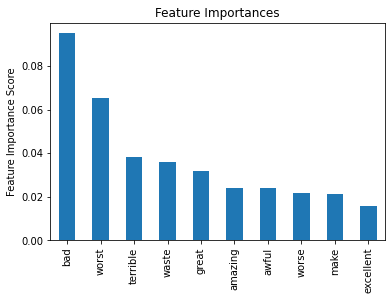

In [69]:
from sklearn.ensemble import GradientBoostingClassifier  # GBM algorithm
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import cross_val_score, GridSearchCV

def modelfit(alg, train_x, train_y, predictors, test_x, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(train_x, train_y)
        
    #Predict training set:
    predictions = alg.predict(train_x)
    predprob = alg.predict_proba(train_x)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, train_x, train_y, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(train_y,predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(train_y, predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    import matplotlib.pyplot as plt
    
    if printFeatureImportance:
        fig,ax = plt.subplots()
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp[:10].plot(kind='bar', title='Feature Importances',ax=ax)
        plt.ylabel('Feature Importance Score')
        
        fig.savefig('GBMimportances.eps', format='eps',bbox_inches='tight')
        fig.savefig('GBMimportances.pdf', format='pdf',bbox_inches='tight')
        fig.savefig('GBMimportances.png', format='png',bbox_inches='tight')
        fig.savefig('GBMimportances.svg', format='svg',bbox_inches='tight')
        
    return alg.predict(test_x)
        
gbm = GradientBoostingClassifier(random_state=10)

start_time = time.time()
test_predictions = modelfit(gbm, train_x, train_y, predictors, test_x)
end_time = time.time()
print("Training the Gradient Boosting Classifier took %3d seconds"%(end_time-start_time))

predicted_labels = test_predictions
print("DEBUG::The Gradient Boosting predicted labels are::")
print(predicted_labels)

acc_score = accuracy_score(test_y, predicted_labels)

print("DEBUG::The Gradient Boosting testing accuracy score is::")
print(acc_score)